# Assignment 5

In [1]:
# Set environment params
Sys.setenv(LANG='en')  # English
install.packages('e1071')
# Import libraries
library(data.table)  # Data manipulate
library(mlr)         # ML toolkit
library(caret)       # ML toolkit
library(ggplot2)     # Visualization
library(pROC)        # AUC, ROC
library(e1071)       # SVM

# Import data
library(ISLR)      # Data from the course book
library(MASS)      # Boston housing dataset
library(datasets)  # US crime dataset
library(dplyr)
# Resize plot
library(repr)  # String and binary representations
#options(repr.plot.width=4, repr.plot.height=4)
#par(cex.lab=0.8, cex.axis=0.8, cex.main=0.8, cex.sub=0.8)

package 'e1071' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\nramanna\AppData\Local\Temp\RtmpgfJAmE\downloaded_packages


Loading required package: ParamHelpers

Warning message: 'mlr' is in 'maintenance-only' mode since July 2019.
Future development will only happen in 'mlr3'
(<https://mlr3.mlr-org.com>). Due to the focus on 'mlr3' there might be
uncaught bugs meanwhile in {mlr} - please consider switching.

Loading required package: ggplot2

Loading required package: lattice


Attaching package: 'caret'


The following object is masked from 'package:mlr':

    train


Type 'citation("pROC")' for a citation.


Attaching package: 'pROC'


The following objects are masked from 'package:stats':

    cov, smooth, var



Attaching package: 'e1071'


The following object is masked from 'package:mlr':

    impute



Attaching package: 'dplyr'


The following object is masked from 'package:MASS':

    select


The following objects are masked from 'package:data.table':

    between, first, last


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'pack

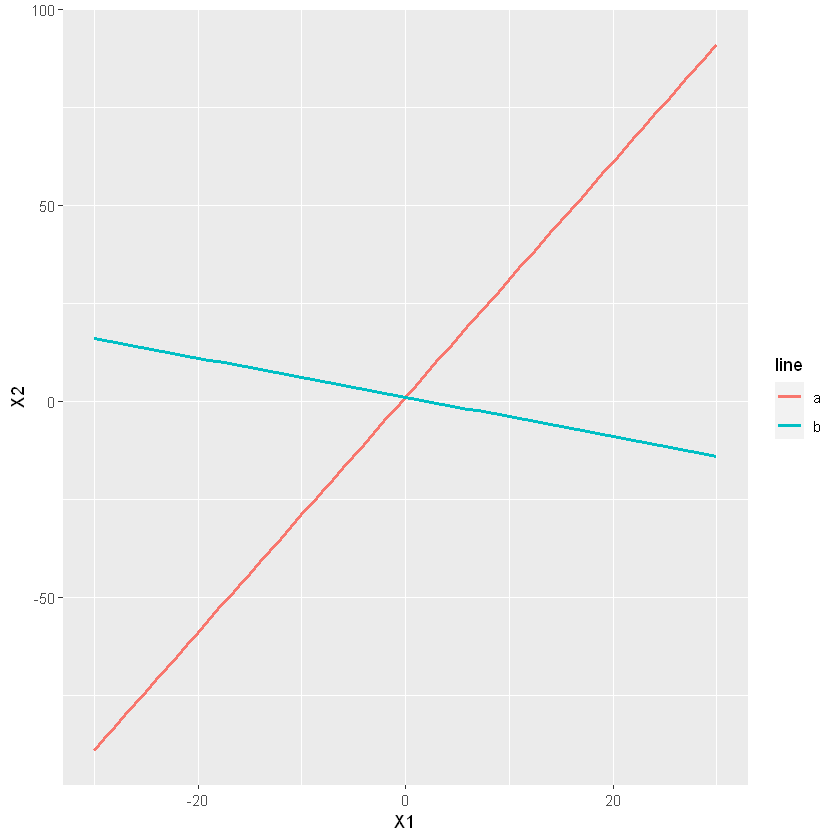

In [2]:
#Question 1
#generate x1 and x2
X1 <- -30:30
X2 <- 3*X1 + 1

df1 <- data.frame(X1, X2, line = "a")

X1 <- -30:30
X2 <- 1 - 0.5*X1

df2 <- data.frame(X1, X2, line = "b")


bind_rows(df1, df2) %>%
  ggplot(aes(x = X1, y = X2, col = line)) + 
  geom_line(size = 1) 

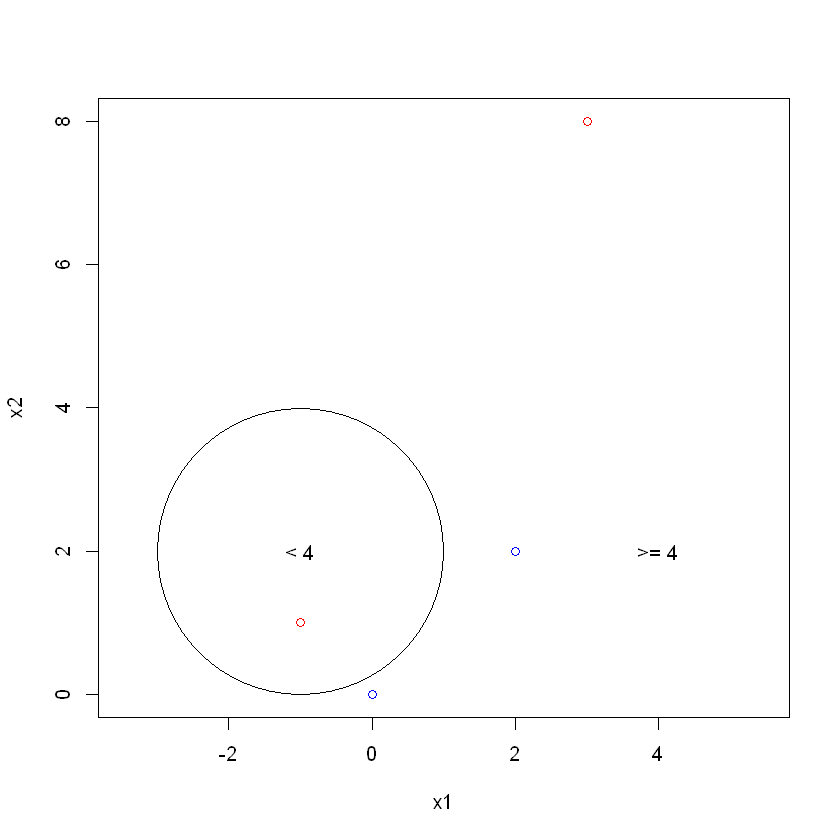

In [3]:
#Question 2
r <- 2
plot(c(0,-1,2,3), c(0,1,2,8),
    col = c("blue", "red", "blue", "red"), 
    type = "p",
    asp = 1, xlab = "x1", 
    ylab = "x2")
symbols(c(-1), c(2), circles = c(r), add = TRUE, inches = FALSE)
text(c(-1), c(2), "< 4")
text(c(4), c(2), ">= 4")

In [70]:
#Question 4
# Generate sample data for 2-classes
set.seed(1)
x <- matrix(rnorm(100 * 2), ncol=2)
y <- c(rep(-1, 10), rep(1, 10))
x[y == 1, ] <- x[y == 1, ] + 2  # Moving this data group to the top-right corner

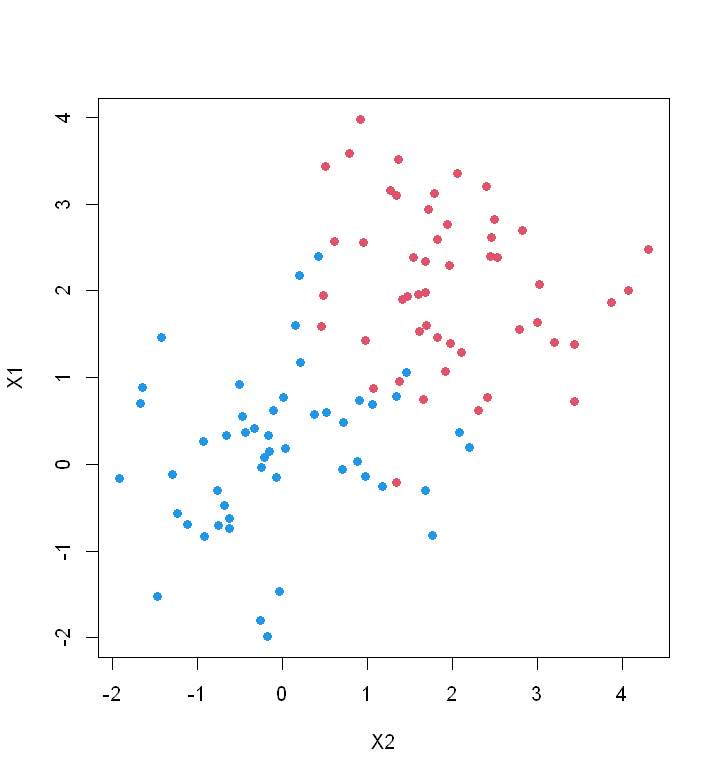

In [71]:
# Plot the sample data
options(repr.plot.width=6, repr.plot.height=6.5)
plot(x[, c(2, 1)], col=(3 - y), pch=19, xlab='X2', ylab='X1')

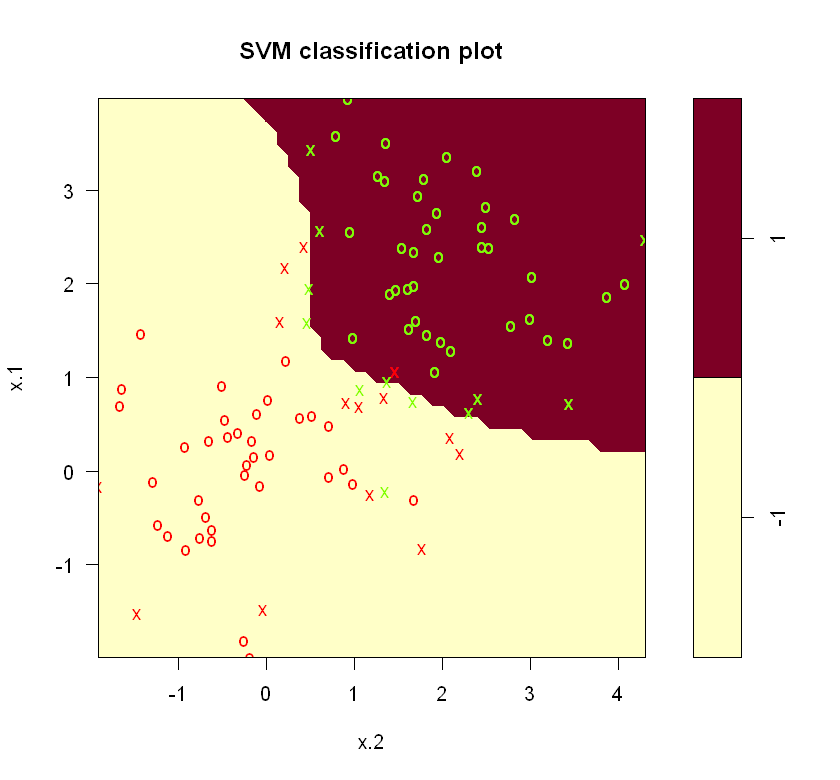

In [72]:
# Prepare data to fit the model
dat <- data.frame(x=x, y=as.factor(y))

# Fit Support Vector Classifier (SVM with radial kernel)
md_svc <- svm(y ~ ., data=dat, kernel='radial', cost=10, scale=F)

# Plot the model result
options(repr.plot.width=7, repr.plot.height=6.5)
plot(md_svc, dat, symbolPalette=rainbow(4))

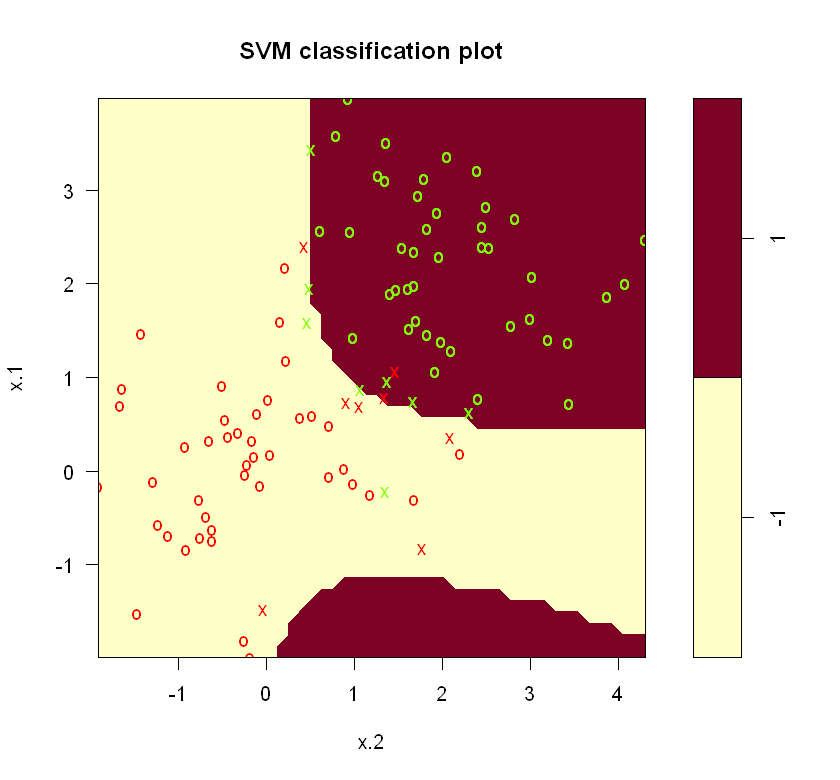

In [73]:
# Fit Support Vector Classifier (SVM with radial kernel)
md_svc <- svm(y ~ ., data=dat, kernel='polynomial', cost=10, scale=F)

# Plot the model result
options(repr.plot.width=7, repr.plot.height=6.5)
plot(md_svc, dat, symbolPalette=rainbow(4))

In [74]:
#Question 7
data(Auto)

In [83]:
#part a
dat <- Auto

#median milage
med_milage <- median(dat$mpg)
class_0_or_1 <- ifelse(dat$mpg > med_milage, 1, 0)
dat['class_0_or_1'] <- as.factor(class_0_or_1)

In [84]:
head(dat)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,class_0_or_1
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
1,18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu,0
2,15,8,350,165,3693,11.5,70,1,buick skylark 320,0
3,18,8,318,150,3436,11.0,70,1,plymouth satellite,0
4,16,8,304,150,3433,12.0,70,1,amc rebel sst,0
5,17,8,302,140,3449,10.5,70,1,ford torino,0
6,15,8,429,198,4341,10.0,70,1,ford galaxie 500,0


In [85]:
#part 2
# Tuning parameter: cost
set.seed(1)
tune_svc <- tune(svm, class_0_or_1 ~ ., data=dat, kernel='linear',
                 ranges=list(cost=c(0.001, 0.01, 0.1, 1.5, 10, 100)))

summary(tune_svc)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost
  1.5

- best performance: 0.01025641 

- Detailed performance results:
     cost      error dispersion
1   0.001 0.09442308 0.04519425
2   0.010 0.07653846 0.03617137
3   0.100 0.04596154 0.03378238
4   1.500 0.01025641 0.01792836
5  10.000 0.02051282 0.02648194
6 100.000 0.03076923 0.03151981


In [86]:
#part 3
set.seed(1)
tune_svc <- tune(svm, class_0_or_1 ~ ., data=dat, kernel='linear',
                 ranges=list(cost=c(0.001, 0.01, 0.1, 1.5, 10),
                            gamma=c(0.5, 1, 2),
                            degree = c(1,2)))

summary(tune_svc)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost gamma degree
  1.5   0.5      1

- best performance: 0.01025641 

- Detailed performance results:
     cost gamma degree      error dispersion
1   0.001   0.5      1 0.09442308 0.04519425
2   0.010   0.5      1 0.07653846 0.03617137
3   0.100   0.5      1 0.04596154 0.03378238
4   1.500   0.5      1 0.01025641 0.01792836
5  10.000   0.5      1 0.02051282 0.02648194
6   0.001   1.0      1 0.09442308 0.04519425
7   0.010   1.0      1 0.07653846 0.03617137
8   0.100   1.0      1 0.04596154 0.03378238
9   1.500   1.0      1 0.01025641 0.01792836
10 10.000   1.0      1 0.02051282 0.02648194
11  0.001   2.0      1 0.09442308 0.04519425
12  0.010   2.0      1 0.07653846 0.03617137
13  0.100   2.0      1 0.04596154 0.03378238
14  1.500   2.0      1 0.01025641 0.01792836
15 10.000   2.0      1 0.02051282 0.02648194
16  0.001   0.5      2 0.09442308 0.04519425
17  0.010   0.5      2 0.07653846 0.0

In [87]:
#part 4
model <- svm(class_0_or_1 ~ ., data=dat, kernel='linear', cost=1.5, gamma = 0.5, degree = 1)
summary(model)


Call:
svm(formula = class_0_or_1 ~ ., data = dat, kernel = "linear", cost = 1.5, 
    gamma = 0.5, degree = 1)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  1.5 

Number of Support Vectors:  53

 ( 25 28 )


Number of Classes:  2 

Levels: 
 0 1




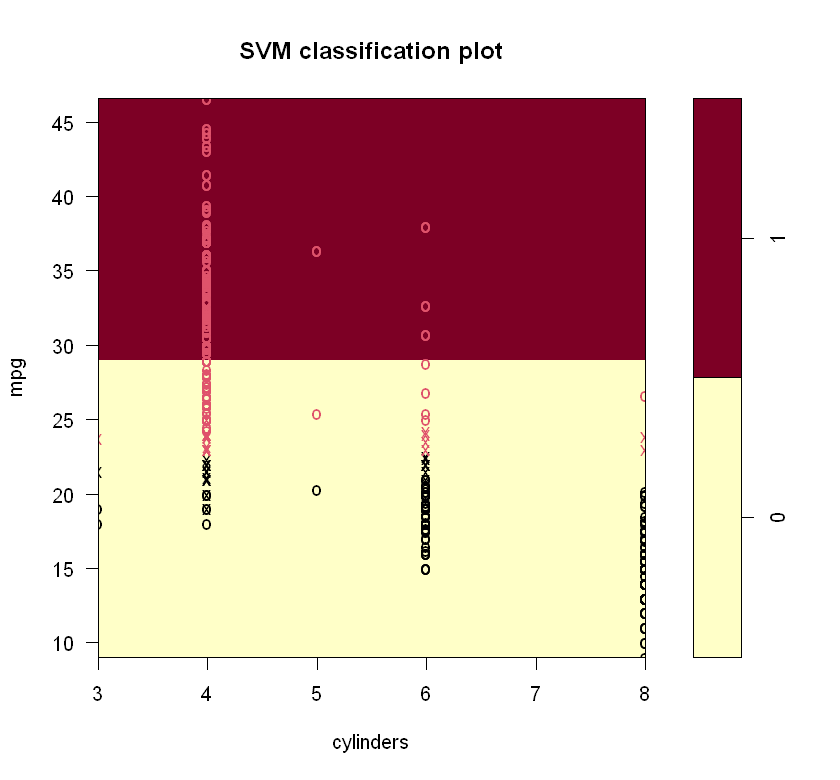

In [92]:
plot(model, dat, mpg~cylinders)

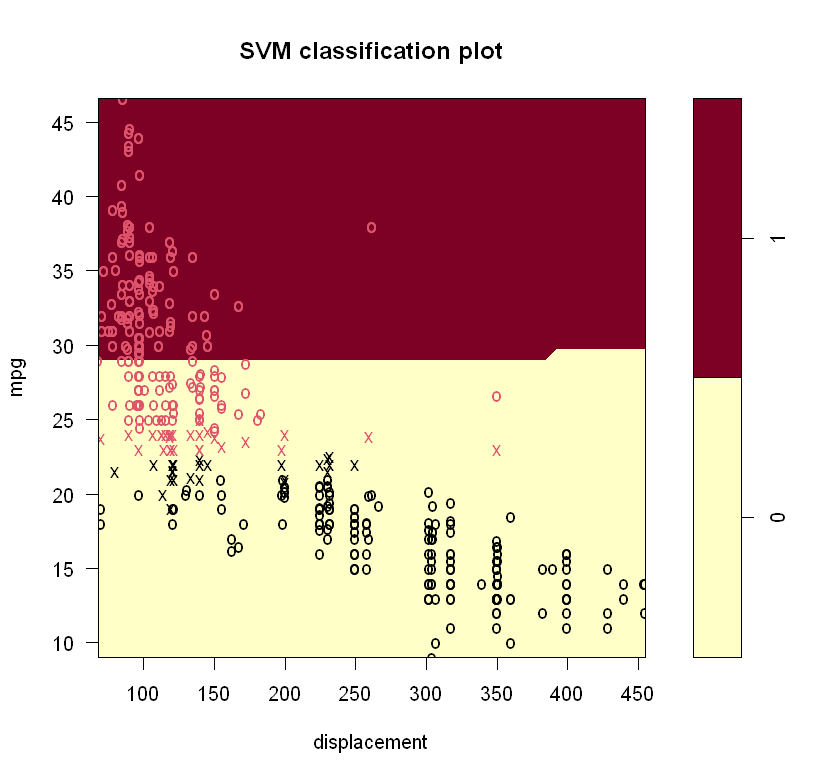

In [93]:
plot(model, dat, mpg~displacement)

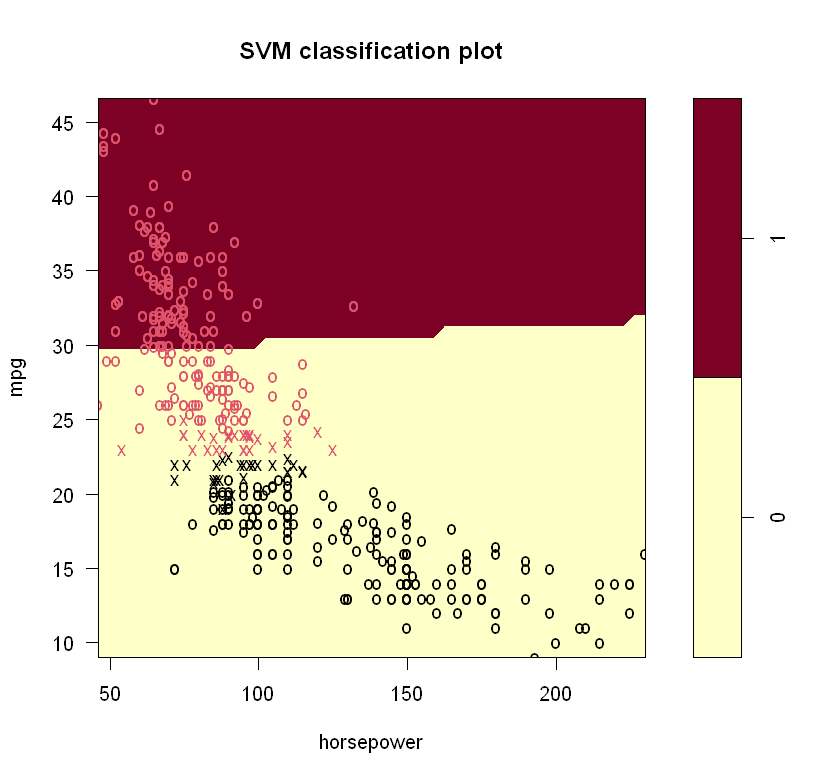

In [94]:
plot(model, dat, mpg~horsepower)

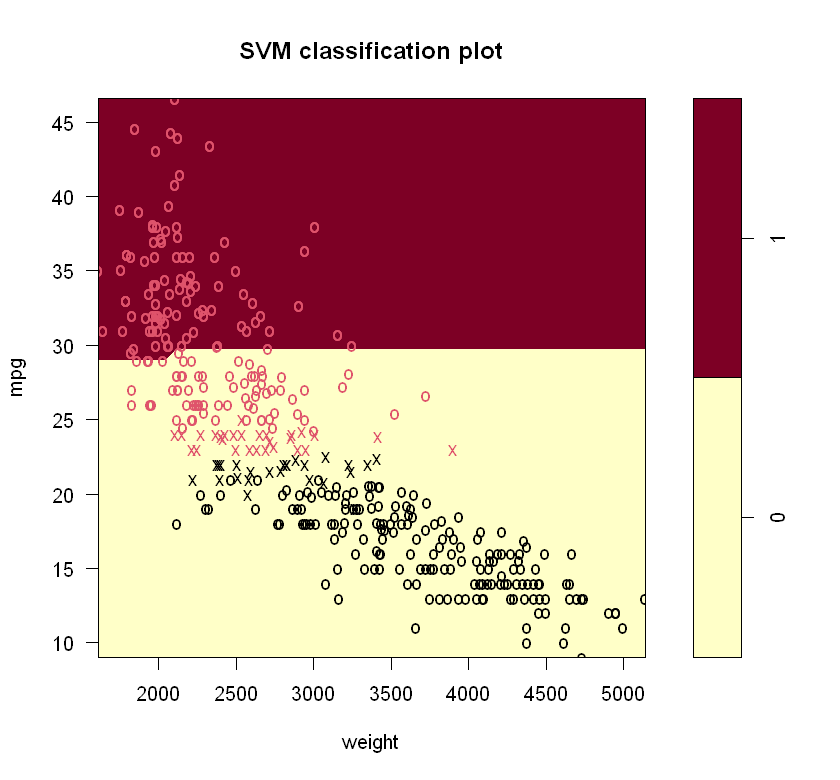

In [96]:
plot(model, dat, mpg~weight)

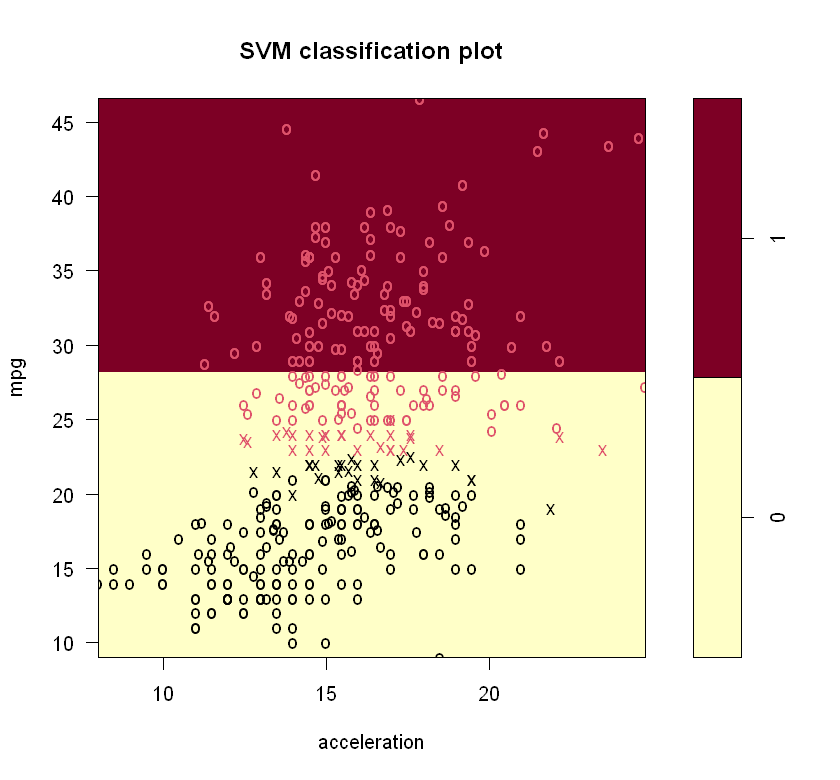

In [97]:
plot(model, dat, mpg~acceleration)

In [33]:
#Question 8
#part 1
dat <- OJ
#train test
set.seed(5)
train_index <- sample(1:nrow(dat), 800)
train_df <- dat[train_index, ]
test_df <- dat[-train_index, ]
head(train_df)

,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
834,MM,241,3,1.79,2.23,0.0,0,0,0,0.204800,2.23,1.79,0.44,No,0,0.000000,0.44,3
697,MM,235,3,1.79,2.09,0.0,0,0,0,0.009007,2.09,1.79,0.30,No,0,0.000000,0.30,3
207,CH,241,7,1.86,2.09,0.0,0,0,0,0.813222,2.09,1.86,0.23,Yes,0,0.000000,0.23,0
715,MM,266,3,1.99,2.09,0.1,0,0,0,0.000162,2.09,1.89,0.20,No,0,0.050251,0.10,3
889,CH,273,1,1.86,2.18,0.0,0,0,0,0.708160,2.18,1.86,0.32,No,0,0.000000,0.32,1
387,MM,229,2,1.69,1.69,0.0,0,0,0,0.165373,1.69,1.69,0.00,No,0,0.000000,0.00,2


In [34]:
head(test_df)

,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
9,CH,235,7,1.75,1.99,0,0.4,0,0,0.982197,1.59,1.75,-0.16,Yes,0.201005,0,0.24,0
14,CH,268,7,1.86,2.13,0,0.0,0,0,0.680000,2.13,1.86,0.27,Yes,0.000000,0,0.27,0
18,MM,268,2,1.86,2.18,0,0.0,0,1,0.400000,2.18,1.86,0.32,No,0.000000,0,0.32,2
19,MM,269,2,1.86,2.18,0,0.0,0,0,0.320000,2.18,1.86,0.32,No,0.000000,0,0.32,2
22,CH,258,1,1.76,2.18,0,0.0,0,0,0.680000,2.18,1.76,0.42,No,0.000000,0,0.42,1
23,CH,259,7,1.86,2.18,0,0.0,0,0,0.744000,2.18,1.86,0.32,Yes,0.000000,0,0.32,0


In [35]:
#part 2
model <- svm(Purchase ~ ., data=train_df, kernel='linear', cost=0.01)
summary(model)


Call:
svm(formula = Purchase ~ ., data = train_df, kernel = "linear", cost = 0.01)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  0.01 

Number of Support Vectors:  441

 ( 219 222 )


Number of Classes:  2 

Levels: 
 CH MM




In [36]:
#part 3
train_pred = predict(model, train_df)
table(train_df$Purchase, train_pred)

    train_pred
      CH  MM
  CH 431  59
  MM  74 236

In [39]:
(74  + 59)/(431 + 74  + 59 + 256)

[1] 0.1621951

In [37]:
test_pred = predict(model, test_df)
table(test_df$Purchase, test_pred)

    test_pred
      CH  MM
  CH 145  18
  MM  27  80

In [40]:
(27+18)/(145+80+27+18)

[1] 0.1666667

In [41]:
# Tuning parameter: cost
set.seed(1)
tune_svc <- tune(svm, Purchase ~ ., data=train_df, kernel='linear',
                ranges=list(cost=c(0.01, 0.25, 0.5, 1, 5, 10))) 
summary(tune_svc)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost
   10

- best performance: 0.16625 

- Detailed performance results:
   cost   error dispersion
1  0.01 0.17500 0.06208194
2  0.25 0.17000 0.06015027
3  0.50 0.17125 0.06237487
4  1.00 0.17000 0.06379220
5  5.00 0.17250 0.06476453
6 10.00 0.16625 0.06265259


In [43]:
#part e
model <- svm(Purchase ~ ., data=train_df, kernel='linear', cost=10)
summary(model)


Call:
svm(formula = Purchase ~ ., data = train_df, kernel = "linear", cost = 10)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  10 

Number of Support Vectors:  334

 ( 167 167 )


Number of Classes:  2 

Levels: 
 CH MM




In [44]:
train_pred = predict(model, train_df)
table(train_df$Purchase, train_pred)

    train_pred
      CH  MM
  CH 435  55
  MM  74 236

In [45]:
(74+55)/(435+55+74+236)

[1] 0.16125

In [46]:
test_pred = predict(model, test_df)
table(test_df$Purchase, test_pred)

    test_pred
      CH  MM
  CH 145  18
  MM  29  78

In [47]:
(29+18)/(145+18+29+78)

[1] 0.1740741

In [55]:
#part f
model.radial <- svm(Purchase ~ ., data=train_df, kernel='radial', cost=10)
summary(model.radial)


Call:
svm(formula = Purchase ~ ., data = train_df, kernel = "radial", cost = 10)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  10 

Number of Support Vectors:  333

 ( 164 169 )


Number of Classes:  2 

Levels: 
 CH MM




In [49]:
# Tuning parameter: cost
set.seed(1)
tune_svc <- tune(svm, Purchase ~ ., data=train_df, kernel='radial',
                ranges=list(cost=c(0.01, 0.25, 0.5, 1, 5, 10))) 
summary(tune_svc)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost
  0.5

- best performance: 0.16875 

- Detailed performance results:
   cost   error dispersion
1  0.01 0.38750 0.05833333
2  0.25 0.17500 0.04082483
3  0.50 0.16875 0.03691676
4  1.00 0.16875 0.03547789
5  5.00 0.18000 0.04647281
6 10.00 0.18125 0.04723243


In [50]:
model <- svm(Purchase ~ ., data=train_df, kernel='radial', cost=0.5)
summary(model)


Call:
svm(formula = Purchase ~ ., data = train_df, kernel = "radial", cost = 0.5)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  0.5 

Number of Support Vectors:  407

 ( 203 204 )


Number of Classes:  2 

Levels: 
 CH MM




In [51]:
train_pred = predict(model, train_df)
table(train_df$Purchase, train_pred)

    train_pred
      CH  MM
  CH 446  44
  MM  81 229

In [52]:
(81+44)/(446+44+81+229)

[1] 0.15625

In [53]:
test_pred = predict(model, test_df)
table(test_df$Purchase, test_pred)

    test_pred
      CH  MM
  CH 149  14
  MM  32  75

In [54]:
(32+14)/(149+14+32+75)

[1] 0.1703704

In [57]:
#part g
model <- svm(Purchase ~ ., data=train_df, kernel='polynomial', cost=0.01, degree = 2)
summary(model)


Call:
svm(formula = Purchase ~ ., data = train_df, kernel = "polynomial", 
    cost = 0.01, degree = 2)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  polynomial 
       cost:  0.01 
     degree:  2 
     coef.0:  0 

Number of Support Vectors:  623

 ( 310 313 )


Number of Classes:  2 

Levels: 
 CH MM




In [58]:
train_pred = predict(model, train_df)
table(train_df$Purchase, train_pred)

    train_pred
      CH  MM
  CH 485   5
  MM 284  26

In [59]:
(285+5)/(485+5+284+26)

[1] 0.3625

In [60]:
test_pred = predict(model, test_df)
table(test_df$Purchase, test_pred)

    test_pred
      CH  MM
  CH 161   2
  MM 104   3

In [61]:
(104+2)/(161+2+104+3)

[1] 0.3925926

In [62]:
# Tuning parameter: cost
set.seed(1)
tune_svc <- tune(svm, Purchase ~ ., data=train_df, kernel='polynomial',
                ranges=list(cost=c(0.01, 0.25, 0.5, 1, 5, 10),
                           degree = c(2))) 
summary(tune_svc)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost degree
   10      2

- best performance: 0.17625 

- Detailed performance results:
   cost degree   error dispersion
1  0.01      2 0.36875 0.06130808
2  0.25      2 0.21875 0.04973890
3  0.50      2 0.20000 0.04409586
4  1.00      2 0.19625 0.05369991
5  5.00      2 0.18375 0.04931827
6 10.00      2 0.17625 0.04543387


In [63]:
model <- svm(Purchase ~ ., data=train_df, kernel='polynomial', cost=10, degree = 2)
summary(model)


Call:
svm(formula = Purchase ~ ., data = train_df, kernel = "polynomial", 
    cost = 10, degree = 2)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  polynomial 
       cost:  10 
     degree:  2 
     coef.0:  0 

Number of Support Vectors:  345

 ( 168 177 )


Number of Classes:  2 

Levels: 
 CH MM




In [64]:
train_pred = predict(model, train_df)
table(train_df$Purchase, train_pred)

    train_pred
      CH  MM
  CH 452  38
  MM  75 235

In [65]:
(75+38)/(452+38+75+235)

[1] 0.14125

In [66]:
test_pred = predict(model, test_df)
table(test_df$Purchase, test_pred)

    test_pred
      CH  MM
  CH 149  14
  MM  31  76

In [67]:
(31+14)/(149+14+76+31)

[1] 0.1666667

In [68]:
#part h
#approach in part g gives the best results